# Objective : Prediction task is to determine whether a person makes over 50k a year.

## Step 1: Import Dependencies

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', None)

## Step 2: Load Dataset

In [12]:
df = pd.read_csv("adult_data.csv",
                 header = None) #header = none because we dont have column name.
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
# for reference to add column name
df.columns 

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [16]:
# adding column name
df.columns = ['Age','Workclass','Fnlwgt','Education','Education_num','martial_status','occupation',
             'relationship','race','sex','capital_gain','captial_loss','hours_per_week','Native_country','Income']
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,martial_status,occupation,relationship,race,sex,capital_gain,captial_loss,hours_per_week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
#For checking Null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
martial_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
captial_loss      0
hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [21]:
df.shape

(32561, 15)

In [23]:
#pyspark is used to handle heavy data (self study)

In [25]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
martial_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
captial_loss       int64
hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [27]:
# creating a dataframe with all categorical data
categorical = [x for x in df.columns if df[x].dtype == 'object']
categorical_data = df[categorical]
print(categorical_data.columns)
print(len(categorical_data.columns))

Index(['Workclass', 'Education', 'martial_status', 'occupation',
       'relationship', 'race', 'sex', 'Native_country', 'Income'],
      dtype='object')
9


In [29]:
#splitting the data into categorical and numeric by manual method the below method can be used 
#when the are many columns 

In [31]:
#creating a dataframe with all nunmeric columns in it 
numerical = [x for x in df.columns if df[x].dtype == 'int64']
numerical_data = df[numerical]
numerical_data.drop(['Fnlwgt'], axis = 1, inplace = True)

## Step 3: EDA (Exploratory Data Analysis)

## histogram works on continous and is univariant analysis 
## univariant analysis 
* hist
* boxplot

In [35]:
# Plotting histogram
def histogram(df, column):
    sns.histplot(df[column])
    plt.title('Histogram of {}'.format(i))
    return plt.show()

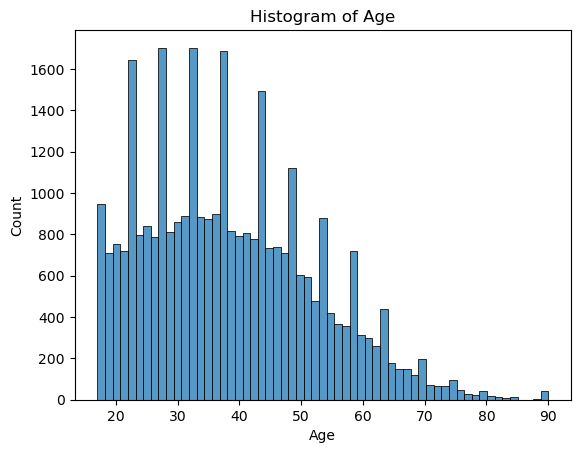

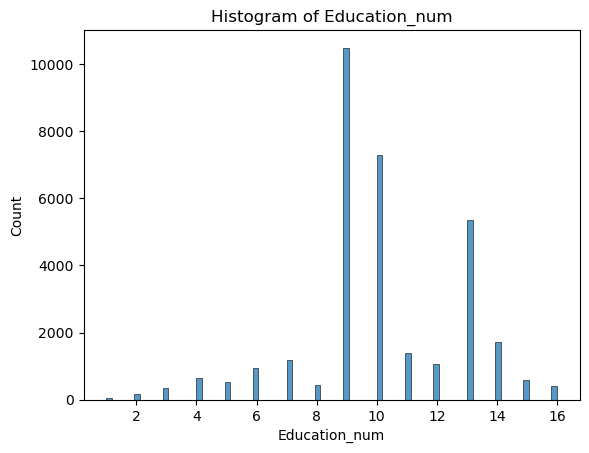

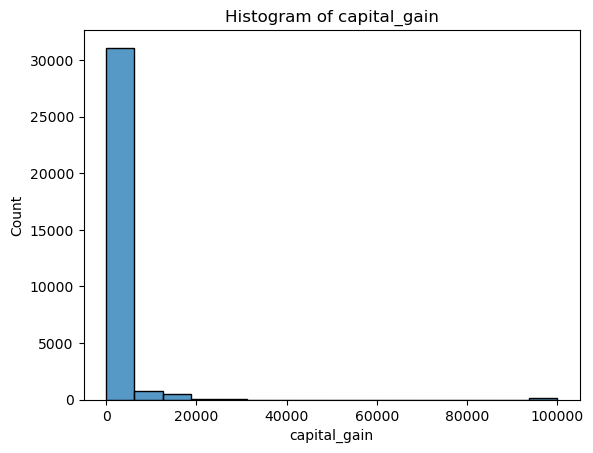

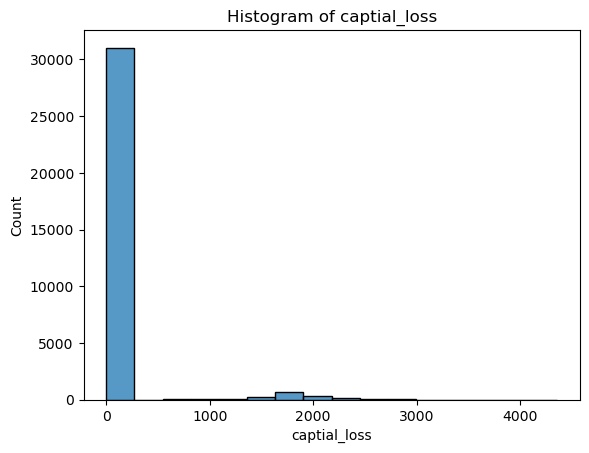

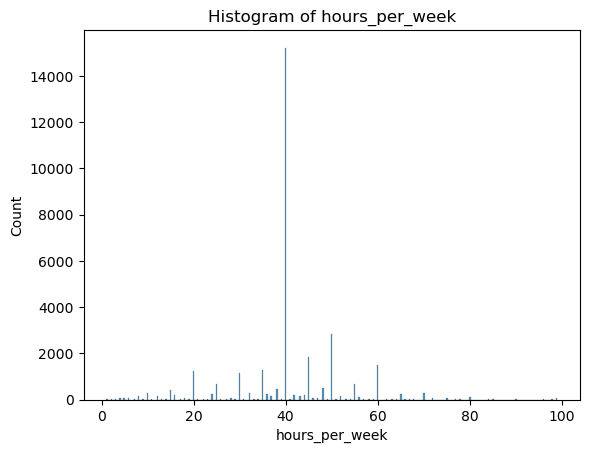

In [37]:
for i in numerical_data:
        histogram(df,i)
        

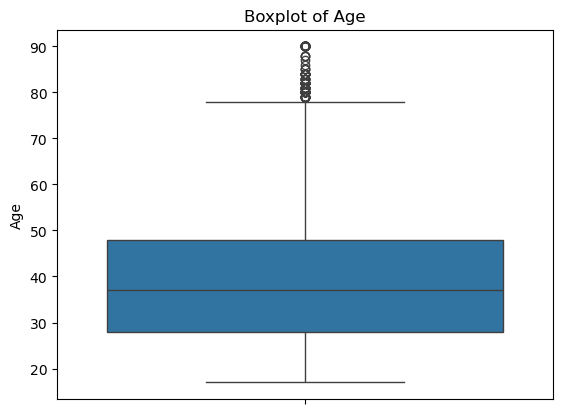

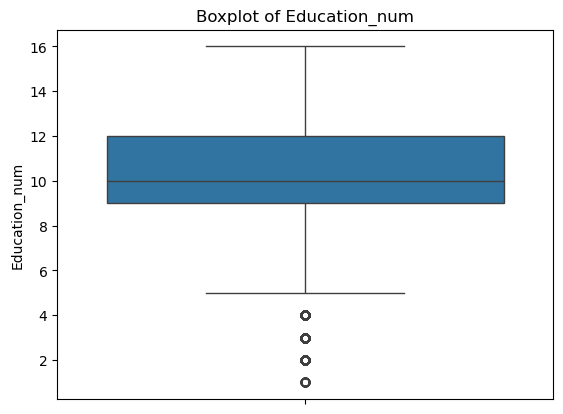

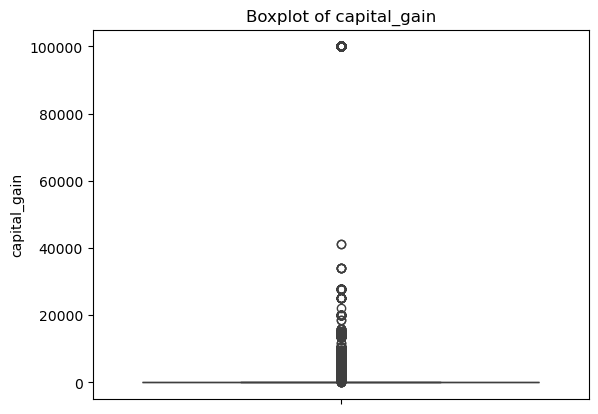

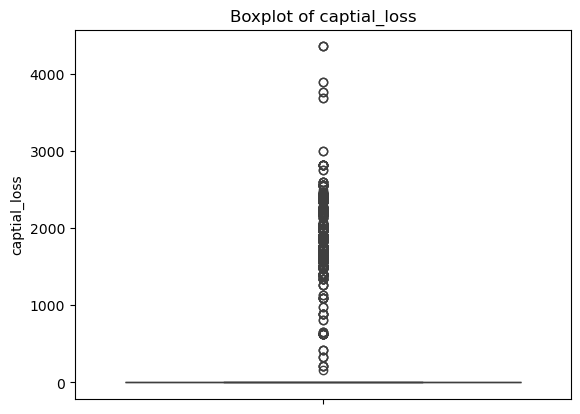

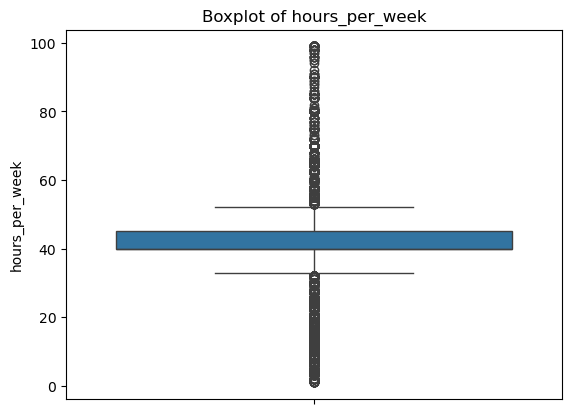

In [39]:
for i in numerical_data:
    sns.boxplot(df[i])
    plt.title('Boxplot of {}'.format(i))
    plt.show()

In [41]:
def create_pie(data, column):
    "Returns pie charts"
    l =list(data[column].value_counts().to_dict().keys())
    s = list(data[column].value_counts().to_dict().values())
    plt.pie(s,
           labels=l,
           autopct = '%1.2f%%',
           startangle = 45)
    plt.axis('equal')
    plt.title('Pie {}' .format(column))
    return plt.show()

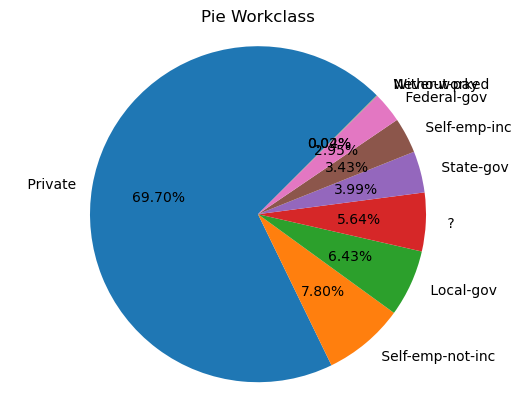

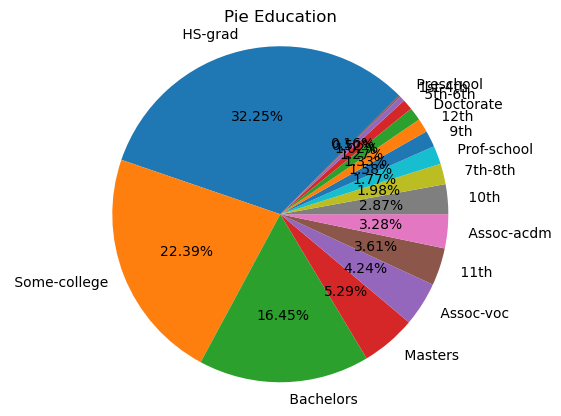

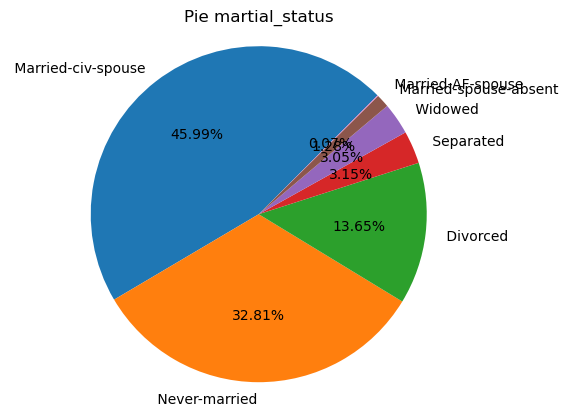

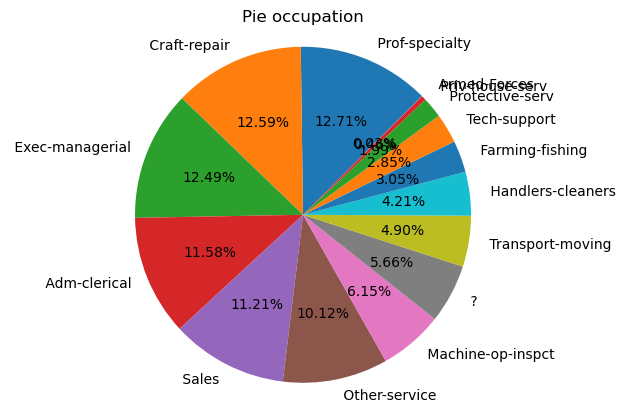

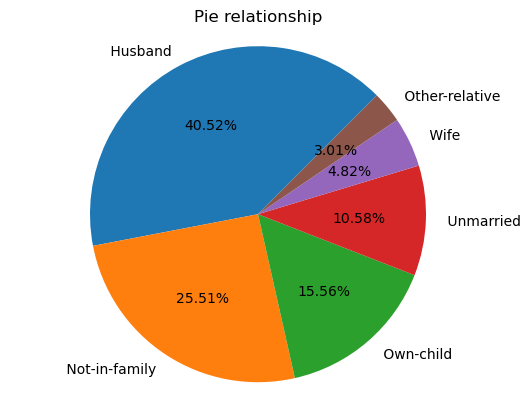

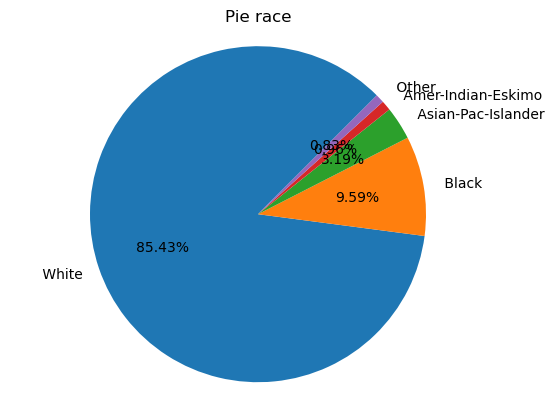

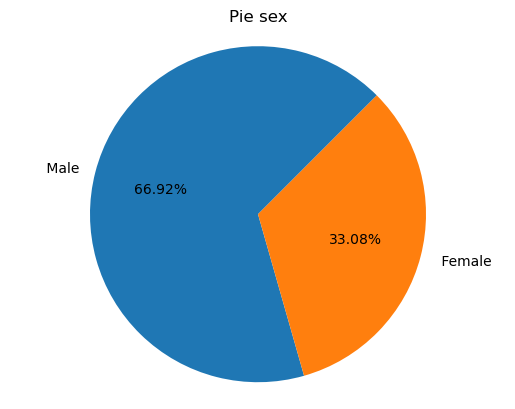

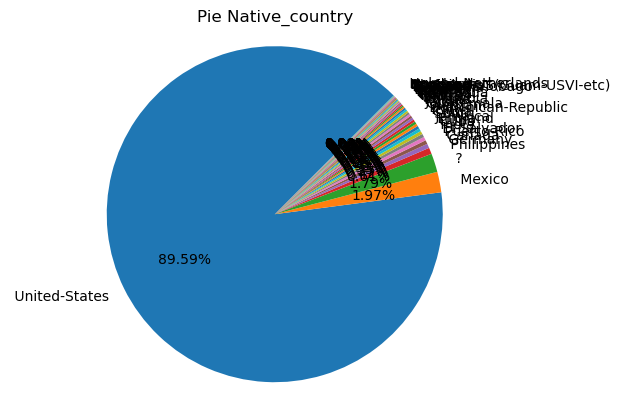

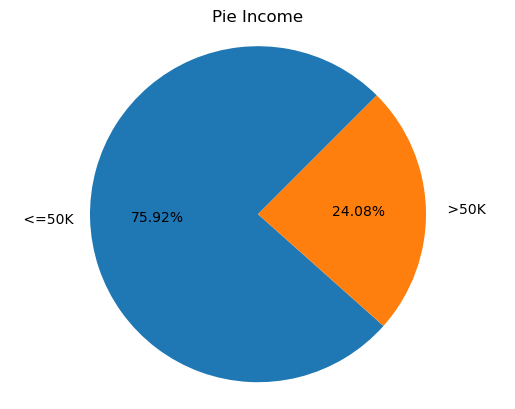

In [43]:
for i in categorical_data:
    create_pie(df,i)

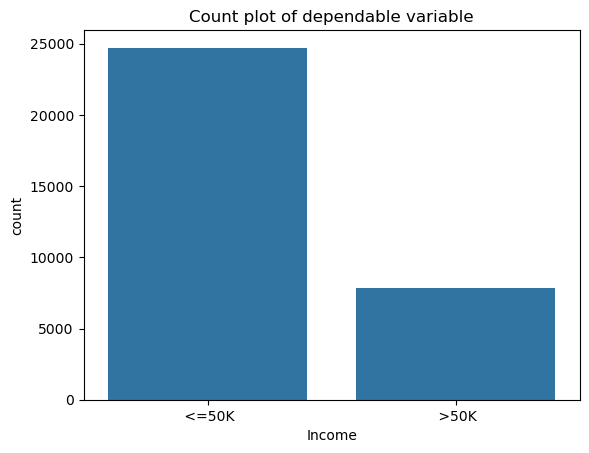

In [45]:
sns.countplot(x= df['Income'],)
plt.title('Count plot of dependable variable')
plt.show()


* In this case the data is imbalanced as <=50k count is more hence the model will get biased to higher count

##  Step 4: Data Preprocessing

In [51]:
# create a copy of the df
df_rev = pd.DataFrame.copy(df)

In [53]:
#Replace ? which is null value in this case with nan
df_rev = df_rev.replace([' ?'],np.nan)

In [55]:
for i in df_rev:
    print('----'*10)
    print(df_rev[i].value_counts())

----------------------------------------
Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
----------------------------------------
Workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
----------------------------------------
Fnlwgt
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: count, Length: 21648, dtype: int64
----------------------------------------
Education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               5

## Missing value 

In [58]:
# defining a function to get count of missing value 
def missing_values(data):
    '''The function missing_values returns dataframe which has columns 
       Total = Total number of missing values in each column
       Percent = How much percent of missing values in each column 
       Datatype = Datatype of each column
       also plots the heatmap'''
    # total returns total number of null values in each column
    total = data.isnull().sum().sort_values(ascending = False)
    # percent tellus how much percent of null values is present in each column
    percent = round((data.isnull().sum()/len(data)*100).sort_values(ascending = False),2)
    # returns datatype of each column
    datatype = data.dtypes
    # making a dataframe of total, percent of missing values in each column
    missing_data = pd.concat([total, percent, datatype], axis = 1, 
                            keys= ['Total', "Percent", 'Datatype']).sort_values('Total', axis=0,ascending= False)
    #plotting a heatmap for missing values
    plt.figure(figsize = (10,5))
    sns.heatmap(data.isnull(), cbar= False, yticklabels=False,cmap='magma' )
    plt.title('Missing data plot')
    print(missing_data)
    return  plt.show()

                Total  Percent Datatype
occupation       1843     5.66   object
Workclass        1836     5.64   object
Native_country    583     1.79   object
Age                 0     0.00    int64
Fnlwgt              0     0.00    int64
Education           0     0.00   object
Education_num       0     0.00    int64
martial_status      0     0.00   object
relationship        0     0.00   object
race                0     0.00   object
sex                 0     0.00   object
capital_gain        0     0.00    int64
captial_loss        0     0.00    int64
hours_per_week      0     0.00    int64
Income              0     0.00   object


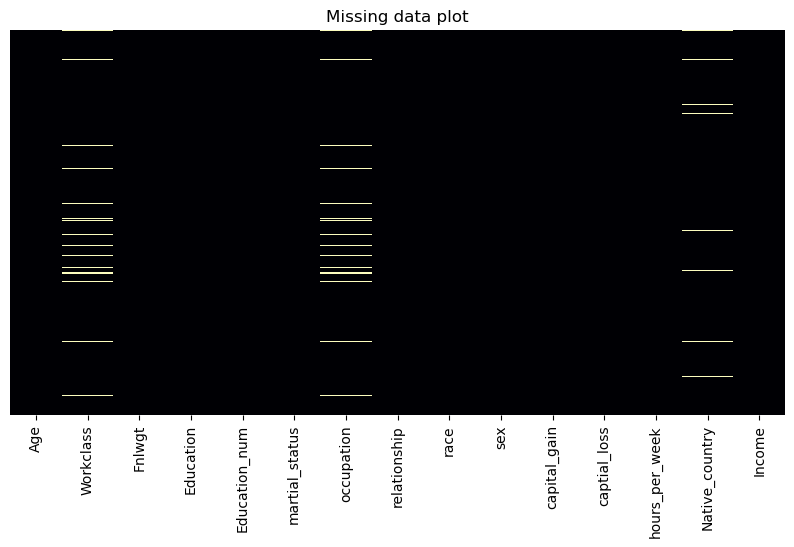

In [60]:
missing_values(df_rev)

* replace the missing values with mode values

In [63]:
for value in ['Workclass','occupation','Native_country']:
    df_rev[value] = df_rev[value].fillna(df_rev[value].mode()[0])

                Total  Percent Datatype
Age                 0      0.0    int64
Workclass           0      0.0   object
Fnlwgt              0      0.0    int64
Education           0      0.0   object
Education_num       0      0.0    int64
martial_status      0      0.0   object
occupation          0      0.0   object
relationship        0      0.0   object
race                0      0.0   object
sex                 0      0.0   object
capital_gain        0      0.0    int64
captial_loss        0      0.0    int64
hours_per_week      0      0.0    int64
Native_country      0      0.0   object
Income              0      0.0   object


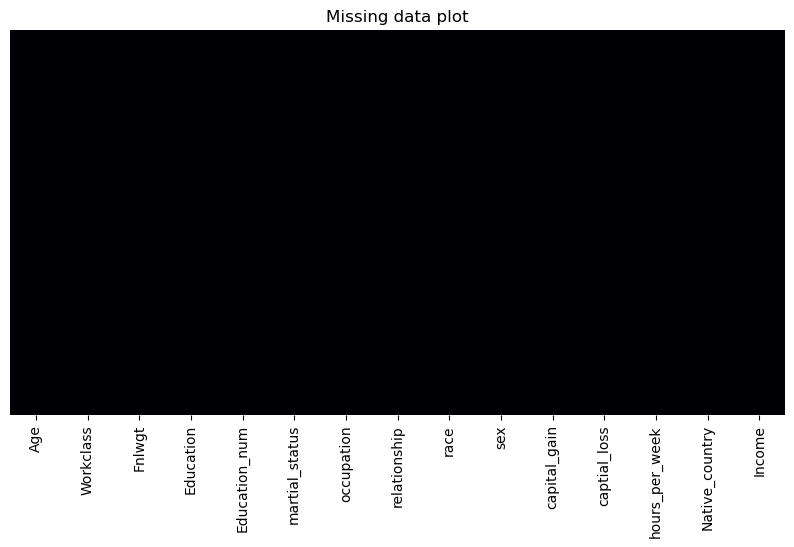

In [65]:
missing_values(df_rev)

In [67]:
colname_cat = []
for x in df_rev.columns:
    if  df_rev[x].dtype == 'object':
        colname_cat.append(x)

In [69]:
for i in colname_cat:
    print('-----'*10)
    print(df_rev[i].value_counts())

--------------------------------------------------
Workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
--------------------------------------------------
Education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
--------------------------------------------------
martial_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spo

## Encoding techniques

In [72]:
from sklearn.preprocessing import LabelEncoder

In [74]:
categorical_data

,Workclass,Education,martial_status,occupation,relationship,race,sex,Native_country,Income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [79]:
numerical_data['Education_num'] = df['Education_num']
numerical_data.head()

,Age,Education_num,capital_gain,captial_loss,hours_per_week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


### 1. Using dummy variables.

* in dummy variable it creates a new column with unique values in each categorical column.

In [88]:
df_rev_dummies = pd.get_dummies(df_rev)
df_rev_dummies.shape

(32561, 107)

### 2.One hot encoder 

In [91]:
colname_cat  = []
for x in df_rev:
    if df_rev[x].dtype == 'object':
        colname_cat.append(x)
print(colname_cat)

['Workclass', 'Education', 'martial_status', 'occupation', 'relationship', 'race', 'sex', 'Native_country', 'Income']


In [93]:
from sklearn import preprocessing
le = preprocessing.OneHotEncoder()# creating an object
df_rev_onehot = pd.DataFrame(le.fit_transform(df_rev[colname_cat]).toarray())# fit 
df_rev_onehot.shape

(32561, 101)

In [95]:
df_rev_onehot.shape

(32561, 101)

In [97]:
# fit --> decision making
#transform ---> change data as per decision
#fit_transform

In [99]:
df_onehot = pd.concat([numerical_data, df_rev_onehot], axis = 1)
df_onehot

,Age,Education_num,capital_gain,captial_loss,hours_per_week,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,39,13,2174,0,40,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,50,13,0,0,13,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,38,9,0,0,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,53,7,0,0,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,28,13,0,0,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,38,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32557,40,9,0,0,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32558,58,9,0,0,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

### 3. Label encoder

In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in colname_cat:
    df_rev[x]= le.fit_transform(df_rev[x])
    
    print()
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Features ', x)
    print('mapping', le_name_mapping)


Features  Workclass
mapping {' Federal-gov': 0, ' Local-gov': 1, ' Never-worked': 2, ' Private': 3, ' Self-emp-inc': 4, ' Self-emp-not-inc': 5, ' State-gov': 6, ' Without-pay': 7}

Features  Education
mapping {' 10th': 0, ' 11th': 1, ' 12th': 2, ' 1st-4th': 3, ' 5th-6th': 4, ' 7th-8th': 5, ' 9th': 6, ' Assoc-acdm': 7, ' Assoc-voc': 8, ' Bachelors': 9, ' Doctorate': 10, ' HS-grad': 11, ' Masters': 12, ' Preschool': 13, ' Prof-school': 14, ' Some-college': 15}

Features  martial_status
mapping {' Divorced': 0, ' Married-AF-spouse': 1, ' Married-civ-spouse': 2, ' Married-spouse-absent': 3, ' Never-married': 4, ' Separated': 5, ' Widowed': 6}

Features  occupation
mapping {' Adm-clerical': 0, ' Armed-Forces': 1, ' Craft-repair': 2, ' Exec-managerial': 3, ' Farming-fishing': 4, ' Handlers-cleaners': 5, ' Machine-op-inspct': 6, ' Other-service': 7, ' Priv-house-serv': 8, ' Prof-specialty': 9, ' Protective-serv': 10, ' Sales': 11, ' Tech-support': 12, ' Transport-moving': 13}

Features  rela

Dependent variable(Income)
* 0 ---> <=50k
* 1 ---> >=50K


label encoder converts the object values based on alphabetical order.

In [107]:
df_rev

,Age,Workclass,Fnlwgt,Education,Education_num,martial_status,occupation,relationship,race,sex,capital_gain,captial_loss,hours_per_week,Native_country,Income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [109]:
# Spliting the dependent variable(y) and independent variable(X)

X = df_rev.iloc[:, 0:-1] # here -1 is exclusive hence income will be in this array
y = df_rev.iloc[:, -1]  # it will return a single y column

In [111]:
print(X.shape)
print(y.shape)

(32561, 14)
(32561,)


In [113]:
# splitting the data in train and test with into 80, 20 respectively
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7, random_state=24)
print('x_train = ' , X_train.shape, 'y_train = ',  y_train.shape)
print('x_test =' , X_test.shape, 'y_test =', y_test.shape)


x_train =  (22792, 14) y_train =  (22792,)
x_test = (9769, 14) y_test = (9769,)


## Data scaling

In [116]:
# standarding the data into unitless and in the range(3,-3)

In [118]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()# creating an object
scaler.fit(X_train)# fitting the data on X_train
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [120]:
X_train_scaler

array([[-1.42295433, -0.08032874,  0.63689544, ..., -0.2163837 ,
        -0.02953596,  0.26174879],
       [-0.98614829, -0.08032874, -1.16305644, ..., -0.2163837 ,
        -0.43472656,  0.26174879],
       [ 0.9066779 , -0.08032874, -1.28691137, ..., -0.2163837 ,
         0.45669275,  0.26174879],
       ...,
       [ 1.925892  , -0.08032874, -0.97182904, ..., -0.2163837 ,
        -1.65029835,  0.26174879],
       [-0.76774527, -0.08032874, -0.76385069, ..., -0.2163837 ,
        -0.02953596,  0.26174879],
       [-0.98614829, -0.08032874, -0.1166893 , ..., -0.2163837 ,
        -0.02953596,  0.26174879]])

## Model Building

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
#create a model
model_lr = LogisticRegression() #object 
# fitting training data to the model
model_lr.fit(X_train_scaler,y_train)

LogisticRegression()

In [127]:
# predicting using the model
y_predict = model_lr.predict(X_test_scaler)
print(list(zip(y_test, y_predict)))

[(0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0),

In [129]:
# to calculate accuracy of the model
t = list(zip(y_test, y_predict))
def accu(pred):
    TC = 0
    for i in t:
        if i[0] == i[1]:
            TC+=1
            c = TC/len(t)
    return c
        

In [131]:
accu(t) # accuracy of the model

0.8229092025795884

In [133]:
from sklearn.metrics import accuracy_score

In [135]:
# accuracy_score using sklearn
accuracy_score(y_test, y_predict)

0.8229092025795884

In [137]:
predicted_data = pd.DataFrame()
#predicted_data = X_test
predicted_data['y_actual'] = pd.Series(y_test)
predicted_data['y_predicted'] = y_predict
predicted_data

,y_actual,y_predicted
4789,0,0
10510,1,0
10135,0,0
32269,0,0
15040,0,0
...,...,...
19294,1,0
26015,0,0
15064,0,0
16945,1,0


* Confusion matrics Eg.Covid-19 (yes = p , no = n)
* True Positive = values that are actually positive and model has predicted as positive
  * person has covid model predicts yes
* True Negative = values that are actually negative and model has predicted as negative 
  * person does not have covid and model predict as no covid 
* False positive = when actual value is negative but model has predicted it as positive(type1)
  * when a person does not have covid but model predicts as yes 
  
* False negative = when actual value is positive but model has predicted it as negative(type2)
  * when a person does have a covid but model predicts as no

* TPR : True positive rate 
    * tpr  = True positive/ false negative + true positive
* FPR : False positive rate 
    * fpr = False positive / true negative + false positive

* TNR : True negative rate 
    * tnr = True negative/ false positive + true negative
* FNR : False negative rate 
    * FNR = False negative / true postive + false negative

## Precision

* precision is all the points that are declared to be positive but what percentage of them are actual 
positive
* how relevant are the predictions
* out of the total predicted positive result how many results are actual positive
* Precision = True positive / predicted positive
* it is also mentioned by +ve predicted value

## Recall 

* it is all the points that are actually positive but what percentage declared positive 
* accuracy score of individual classes
* out of the total positive actual values how many values did we correctly predicted positive
* recall = true positive / actual positive
* it is also mentioed by tpr and sensitivity

In [144]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [146]:
confusion_matrix(y_test, y_predict)

array([[6959,  416],
       [1314, 1080]], dtype=int64)

In [148]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7375
           1       0.72      0.45      0.56      2394

    accuracy                           0.82      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.81      0.82      0.81      9769



In [150]:
import itertools

In [152]:
def plot_confusion_matrix(y_test, y_predict, classes,
                         normalize = False,
                         title = 'Confusion Matrix',
                         cmap = plt.cm.Reds):
    '''Objective 
       ---------
       plot confusion matrix , classification report and accuracy scores
       
       parameters
       -----------
       y_test: array-like of shape(n_samples)
               actual value or ground truth.
            
       y_predict : array-like of shape(n_sample,)
                   values predicted by the model
            
       Classes: list
                list of label to index the matrix
        
       title : title of the matrix
       
       cmap : colormap for matrix
       
       returns
       --------
       all accuracy matrix
       
       '''
    cm = confusion_matrix(y_test, y_predict)
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion matrix without normalization')
        
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j,i, format(cm[i,j], fmt),
                horizontalalignment='center',
                color = 'white' if cm[i,j]> thresh else 'black')
        
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    print('-----------------------------------------------------------------------')
    print('Classification Report')
    print(classification_report(y_test, y_predict))
    acc = accuracy_score(y_test, y_predict)
    print('Accuracy of the model: ', acc)
    

Normalized Confusion Matrix


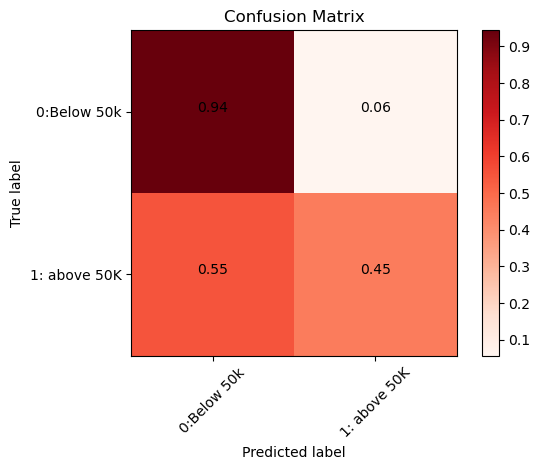

-----------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7375
           1       0.72      0.45      0.56      2394

    accuracy                           0.82      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8229092025795884


In [154]:
plot_confusion_matrix(y_test, y_predict,normalize=True, classes=['0:Below 50k', '1: above 50K'])

## Adjusting threshold

In [157]:
# store the predicted probabilities
y_pred_prob = model_lr.predict_proba(X_test_scaler)
print(y_pred_prob)

[[0.79081855 0.20918145]
 [0.74657924 0.25342076]
 [0.88367843 0.11632157]
 ...
 [0.98914737 0.01085263]
 [0.65506287 0.34493713]
 [0.68464365 0.31535635]]


In [159]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.45:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

In [161]:
cfm= confusion_matrix(y_test, y_pred_class)
print(cfm)
acc = accuracy_score(y_test, y_pred_class)
print(classification_report(y_test, y_pred_class))
print('Accuracy of the model: ', acc)

[[6825  550]
 [1178 1216]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7375
           1       0.69      0.51      0.58      2394

    accuracy                           0.82      9769
   macro avg       0.77      0.72      0.74      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8231139318251612


In [163]:
for a in np.arange(0.4,0.66, 0.01):
    predict_mine = np.where(y_pred_prob[:,1]>a,1,0)
    cfm = confusion_matrix(y_test, predict_mine)
    total_err= round(cfm[0,1]+cfm[1,0])
    print("Threshold: {} Total ER: {} Type2 : {} Type1: {} ".format(round(a,2), total_err, cfm[1,0], cfm[0,1]))
    

Threshold: 0.4 Total ER: 1747 Type2 : 1045 Type1: 702 
Threshold: 0.41 Total ER: 1730 Type2 : 1066 Type1: 664 
Threshold: 0.42 Total ER: 1724 Type2 : 1090 Type1: 634 
Threshold: 0.43 Total ER: 1728 Type2 : 1117 Type1: 611 
Threshold: 0.44 Total ER: 1724 Type2 : 1144 Type1: 580 
Threshold: 0.45 Total ER: 1728 Type2 : 1178 Type1: 550 
Threshold: 0.46 Total ER: 1718 Type2 : 1203 Type1: 515 
Threshold: 0.47 Total ER: 1730 Type2 : 1239 Type1: 491 
Threshold: 0.48 Total ER: 1732 Type2 : 1262 Type1: 470 
Threshold: 0.49 Total ER: 1733 Type2 : 1292 Type1: 441 
Threshold: 0.5 Total ER: 1730 Type2 : 1314 Type1: 416 
Threshold: 0.51 Total ER: 1742 Type2 : 1348 Type1: 394 
Threshold: 0.52 Total ER: 1749 Type2 : 1371 Type1: 378 
Threshold: 0.53 Total ER: 1754 Type2 : 1388 Type1: 366 
Threshold: 0.54 Total ER: 1755 Type2 : 1410 Type1: 345 
Threshold: 0.55 Total ER: 1756 Type2 : 1434 Type1: 322 
Threshold: 0.56 Total ER: 1753 Type2 : 1455 Type1: 298 
Threshold: 0.57 Total ER: 1765 Type2 : 1476 Type1: